# Task 1 Housing Price Prediction Using Linear Regression

Develop a Linear Regression model to predict housing prices. The task includes:

- **Model Building:** Train a Linear Regression model using features such as `total_rooms`, `total_bedrooms`, and `households` to predict `median_house_value`.
- **Data Visualization:** 
  - **Pair Plot:** Illustrate relationships between features and the target variable.
  - **Actual vs. Predicted Prices:** Scatter plot to compare actual prices with predicted values.
- **Model Evaluation:** Calculate and display the Root Mean Squared Error (RMSE) to assess the model’s performance.

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Load the Dataset

In [2]:
df = pd.read_csv('housing.csv') 

 Explore the dataset

In [3]:
print(df.head())
print(df.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

For this model, let's consider features: total_rooms, total_bedrooms, and households (as proxies for size and capacity).

In [4]:
df = df[['total_rooms', 'total_bedrooms', 'households', 'median_house_value']]

Handle missing data

In [5]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

Visualize the relationships between features and the target variable

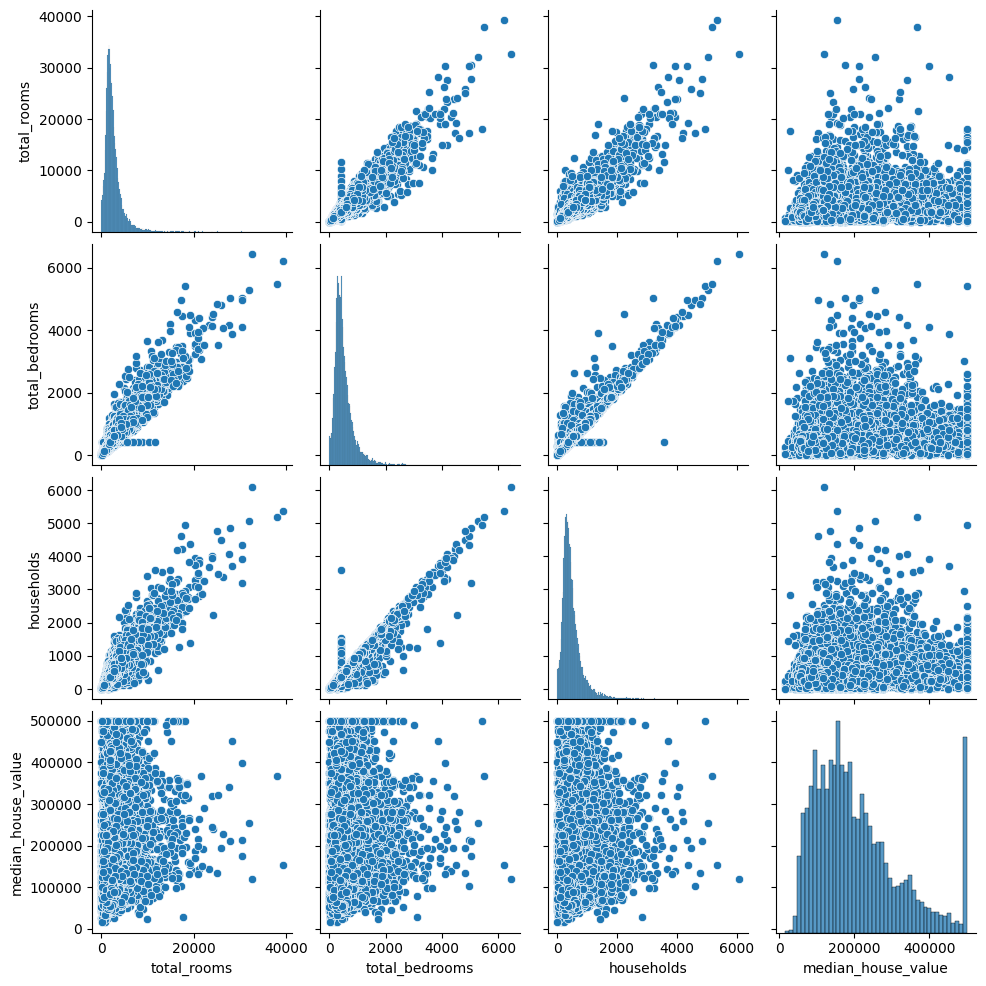

In [6]:
sns.pairplot(df)
plt.show()

Define features (X) and target variable (y)

In [7]:
X = df[['total_rooms', 'total_bedrooms', 'households']]
y = df['median_house_value']

Split the data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize the linear regression model

In [9]:
model = LinearRegression()

Train the model

In [10]:
model.fit(X_train, y_train)

LinearRegression()

Make predictions on the test set

In [11]:
y_pred = model.predict(X_test)

Evaluate the model performance

In [12]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 112761.79231671257


Compare the predicted prices with actual prices

In [13]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

         Actual      Predicted
20046   47700.0  179615.338203
3024    45800.0  248815.499151
15663  500001.0  312498.299077
20484  218600.0  244755.669304
9814   278000.0  214787.402817


Visualize the performance

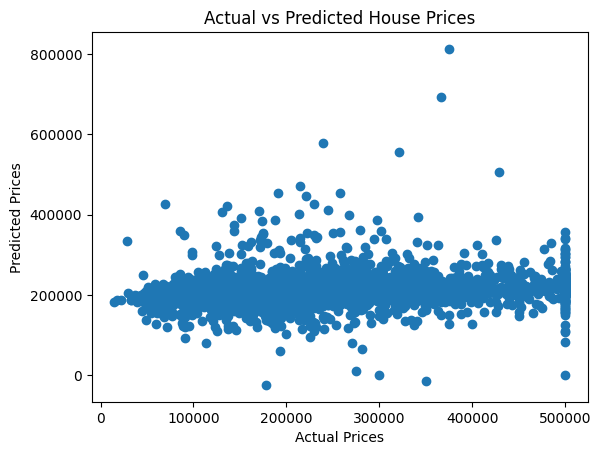

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()